In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
print('setup complete')

setup complete


In [46]:
#load the dataset and check the first five rows
df = pd.read_csv(r'https://raw.githubusercontent.com/GauravGurv/Practice_Dataset/f0defb1b1ec97b4948e12c1ba16d8f1780842261/ds_salaries.csv?token=GHSAT0AAAAAACB5ZS7K2NC3BE6NRF454R7WZCRBW2Q')
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [47]:
# We can remove the salary and salary_currency columns and salary_usd in enough for EDA
df.drop(['salary_currency','company_location'],axis=1,inplace=True)
df.head(3)
# df.shape


,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,employee_residence,remote_ratio,company_size
0,2023,SE,FT,Principal Data Scientist,80000,85847,ES,100,L
1,2023,MI,CT,ML Engineer,30000,30000,US,100,S
2,2023,MI,CT,ML Engineer,25500,25500,US,100,S


In [49]:
# we have to remove duplicate from 
df.drop_duplicates()

,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,employee_residence,remote_ratio,company_size
0,2023,SE,FT,Principal Data Scientist,80000,85847,ES,100,L
1,2023,MI,CT,ML Engineer,30000,30000,US,100,S
2,2023,MI,CT,ML Engineer,25500,25500,US,100,S
3,2023,SE,FT,Data Scientist,175000,175000,CA,100,M
4,2023,SE,FT,Data Scientist,120000,120000,CA,100,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,412000,US,100,L
3751,2021,MI,FT,Principal Data Scientist,151000,151000,US,100,L
3752,2020,EN,FT,Data Scientist,105000,105000,US,100,S
3753,2020,EN,CT,Business Data Analyst,100000,100000,US,100,L


In [50]:
# for finding duplicates in book
print(df.duplicated().sum())

1171


In [51]:
# in previous command we have removed a duplicate and in this shape command column and rows  are same
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(3755, 9)
(2584, 9)


In [52]:
#-------------------Descriptives of data------------------------------
# using skimpy library
print(df.info())
print(df.describe())
print(df.dtypes)
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_in_usd       2584 non-null   int64 
 6   employee_residence  2584 non-null   object
 7   remote_ratio        2584 non-null   int64 
 8   company_size        2584 non-null   object
dtypes: int64(4), object(5)
memory usage: 201.9+ KB
None
         work_year        salary  salary_in_usd  remote_ratio
count  2584.000000  2.584000e+03    2584.000000   2584.000000
mean   2022.301084  2.103653e+05  133409.280186     50.483746
std       0.749179  8.080375e+05   67136.837329     48.163707
min    2020.000000  6.000000e+03    5132.000000      0.000000

In [53]:
#-------------------EDA AND DATA VISUALIZATION------------------------------
print(df['experience_level'].unique())
'''
Some details
SE : SENIOR_LEVEL           MI : MEDIUM_LEVEL           EN : ENTRY_LEVEL            EX : EXECUTIVE_LEVEL
FT : FULL_TIME              CT : CONTRACT               FL : FREE_LANCE             PT : PART_TIME
'''

['SE' 'MI' 'EN' 'EX']


'\nSome details\nSE : SENIOR_LEVEL           MI : MEDIUM_LEVEL           EN : ENTRY_LEVEL            EX : EXECUTIVE_LEVEL\nFT : FULL_TIME              CT : CONTRACT               FL : FREE_LANCE             PT : PART_TIME\n'

In [54]:
#number of jobs based on experience level
print(df['experience_level'].value_counts())

jobs=df['job_title'].value_counts()
print(jobs)

print(df.nunique())

SE    1554
MI     664
EN     270
EX      96
Name: experience_level, dtype: int64
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Compliance Data Analyst        1
Deep Learning Researcher       1
Staff Data Analyst             1
Data DevOps Engineer           1
Finance Data Analyst           1
Name: job_title, Length: 93, dtype: int64
work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_size             3
dtype: int64


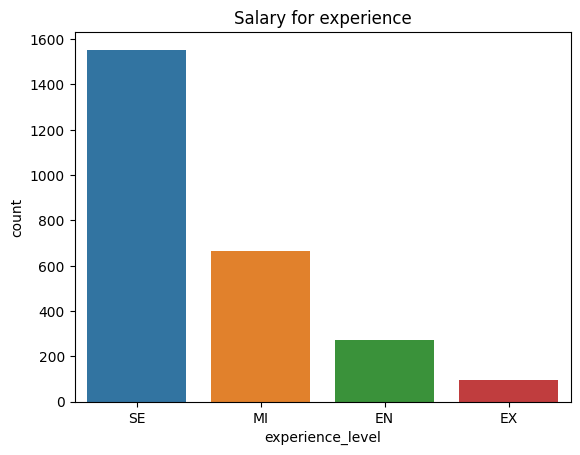

In [55]:
#-----------<AxesSubplot: title={'center': 'Salary for experience'}, xlabel='experience_level', ylabel='count'>---------------
plt.title("Salary for experience")
plt.xlabel('Experiance_level')
plt.ylabel('Salary')
sns.countplot(data=df,x="experience_level")
plt.show()

In [57]:
#---------------------boxplot (showing salary)----------------------------
#This box plot is saying that minimum salary in data_scinece field is 5132_dollars and maximum salary is 450k_dollars
fig=px.box(df['salary_in_usd'])
fig.show()


<ipython-input-58-e208b984fe02>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.




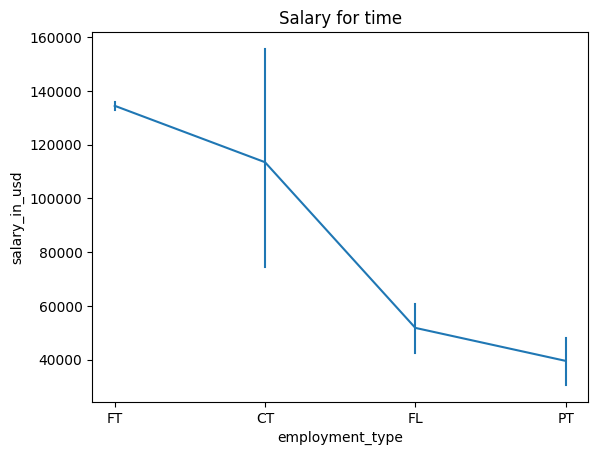

In [58]:
#-------------------Lines plot---------------------------------
#people who are hired for full time get more salary then other peole working and the below graph is showing us
# that in 2023 companies are hiring mostly for full time
plt.title("Salary for time")
sns.lineplot(x='employment_type', y='salary_in_usd', data=df, err_style='bars',ci=68)
plt.show()


<ipython-input-59-1b1a18e47121>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




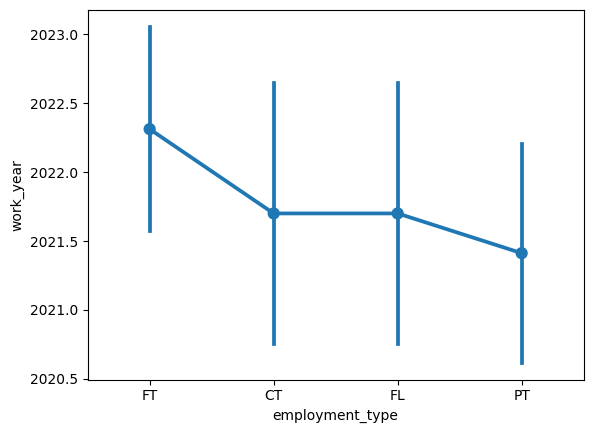

In [59]:
#-------------------Point plot---------------------------------
sns.pointplot(x='employment_type', y='work_year', data=df, ci='sd')
plt.show()



In [60]:
#-------------------understand with violin plot---------------------------------
fig=px.violin(df,x='employment_type',y='salary_in_usd',box=True)
fig.show()


In [61]:
'''
The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. 
Select only valid columns or specify the value of numeric_only to silence this warning.
'''
df_corr=df.corr()
print(df_corr)

               work_year    salary  salary_in_usd  remote_ratio
work_year       1.000000 -0.099153       0.236958     -0.219160
salary         -0.099153  1.000000      -0.043672      0.026485
salary_in_usd   0.236958 -0.043672       1.000000     -0.084502
remote_ratio   -0.219160  0.026485      -0.084502      1.000000


<ipython-input-61-32a6f5ec0f65>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Axes(0.125,0.11;0.62x0.77)


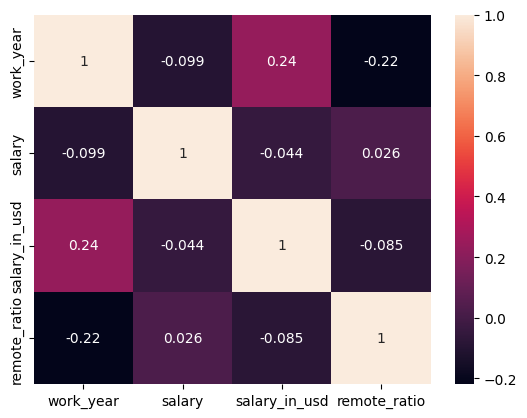

In [63]:
'''
There is a positive correlation (0.24) between work_year and salary_in_usd, 
which suggests that people with more years of work experience tend to have higher salaries.

There is a negative correlation (-0.22) between work_year and remote_ratio, 
which suggests that people with more years of work experience tend to work less remotely.

There is a weak negative correlation (-0.08) between salary_in_usd and remote_ratio, 
which suggests that people who work remotely do not necessarily have lower salaries.
'''
print(sns.heatmap(df_corr, annot=True))

In [64]:
fig=px.sunburst(df,path=['job_title','employment_type','experience_level'],values='salary_in_usd')
fig.show()
